In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import json
import numpy as np
from matplotlib import pyplot as plt

from lib.BBData import character_dict
from lib.BBDataLoad import open_char_dataset, process_char_dataset
from lib.metrics.persgraph_classifier import TVShowGraphDataset, PersGRAPH_classifier

In [44]:
# load the pretrained model if True
F_pretrained = True
# flag for crete data
F_create_data = False
# load characters names
characters = list(character_dict.keys())
# setup folders
base_folder = os.getcwd()
data_folder = join(base_folder, 'Data')
pt_folder = join(base_folder, 'Data', 'pt_graphs')
characters_folder = join(data_folder, 'Characters')
model_folder = join(os.getcwd(), 'models', 'persgraph_classifier')
model_path = join(model_folder, 'persgraph_classifier')

# PersGRAPH classifier

This model implement another approach to look at this task considering the sentence embedding 

In [36]:
# initialize model
persgraph_cls = PersGRAPH_classifier(model_path, from_pretrained=F_pretrained, use_cuda=True)
if not F_create_data:
    # create data
    persgraph_cls.create_data(data_folder, characters_folder, 
                            verbose=True, override_graphs = True,
                            n_sentences_range=(20,30))

In [50]:
# setup vector to count how many graph in training set
count_data = [0 for c in characters]
folderset_path = join(data_folder, 'graphs', 'trainSet')
# count number of classes in json folder 
for jsonfile in os.listdir(folderset_path):
    graph = join(folderset_path, jsonfile)
    # read the file
    with open(graph, "r") as file:
        graphConversation = json.load(file)
        # extract label onehot vector
        yonehot = graphConversation['y']
        # count
        count_data[np.argmax(yonehot)] += 1
for c, ngraphs in zip(characters, count_data):
    print(f'num graphs for {c} is {ngraphs}')

KeyboardInterrupt: 

---

In [15]:
X_train, X_valid, X_test = persgraph_cls.get_data(pt_folder, batch_size=512)

In [37]:
# train the model if not loaded a pretrained version of it
if not F_pretrained:
    train_histories = persgraph_cls.train(X_train, X_valid, epochs=50, optimizer='adamw', lr=1e-4, patience=5)
# read histories of trained model
history_path = join(model_folder, 'train_history.json')
with open(history_path, "r") as file:
    train_histories = json.load(file)

## Valid epoch = 15: 100%|██████████| 12/12 [00:01<00:00,  7.04it/s, valid_loss=0.516, valid_f1score=0.794]


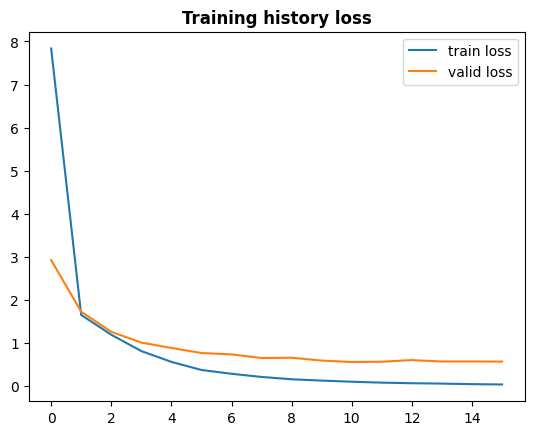

In [49]:
# plot training loss
plt.plot(train_histories['training_loss'])
plt.plot(train_histories['validation_loss'])
plt.legend(['train loss', 'valid loss'])
plt.title('Training history loss', fontweight='bold')
plt.show()

## Test : 100%|██████████| 26/26 [00:03<00:00,  6.92it/s]


0.7522511433351093


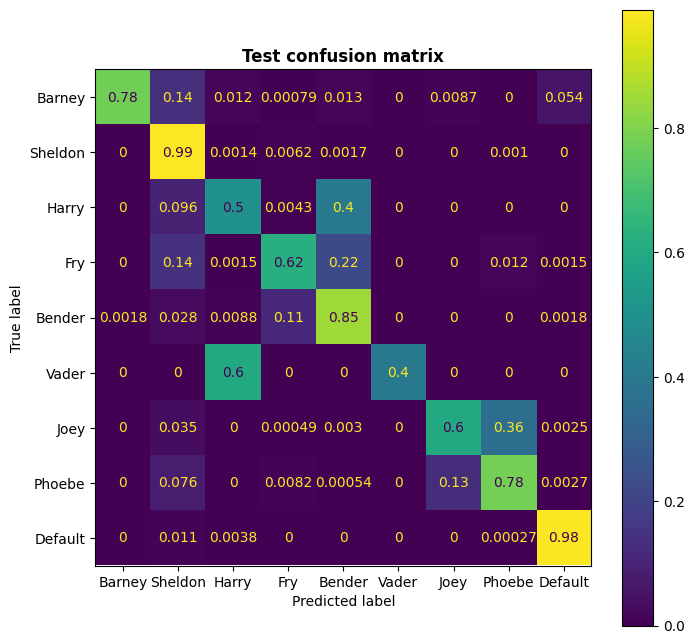

In [47]:
# plot test confusion metrix
persgraph_cls.test(X_test);